In [4]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform
import warnings
warnings.filterwarnings('ignore')

# ENTER CSV INFORMATION BELOW

In [5]:
## Paths Input Here
analysis = "scatterplot_analysis"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_analyses/ses-01/sub-all/all_data/all_metadata_spreadsheet.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')

if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)
print('I will save to:', out_dir)
save = True
do_transform = False

I will save to: /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_analyses/ses-01/sub-all/all_data/scatterplot_analysis


## Import Pre-Prepared DF

In [6]:
variables_to_change = {}
variables_to_change['original'] = [
    'percent_change_adascog11'
  
    ]
variables_to_change['destination'] = [
    '% Improvement (ADAS-Cog11)'
    
    ]
#----------------------------------------------------------------user input above----------------------------------------------------------------
data_df = pd.read_csv(conn_path)
# try:
#     data_df = data_df.set_index('Unnamed: 0')
# except:
#     print('Could not find ("Unnamed: 0") ')
#Rename variables to prevent errors
## Set a list of the variables to be fed into DF
change_string = ''
try:
    for i in range (0, len(variables_to_change['original'])):
        change_string += f"variables_to_change['original'][{i}]: variables_to_change['destination'][{i}],"
    change_string = 'data_df.rename(columns={' + change_string[0:-1] + '})'
    data_df = eval(change_string)
except:
    print('Could not change name of input string')
#Organize the columns
# import natsort
# natsorted_columns = natsort.natsorted(data_df.columns)
# data_df = data_df.reindex(columns=natsorted_columns)

In [7]:
#place response column at start of dataframe
# response_series = data_df.pop(variables_to_change['destination'][0])
# data_df.insert(0, variables_to_change['destination'][0], response_series)

# #Remove outlier
# outlier_index=[11, 47, 48, 49]
# data_df = data_df.drop(index=outlier_index)

#Handle NaNs
#Drop NANs
# data_df.dropna(inplace=True)

#One Hot Encode
# data_df.loc[:, 'Randomization Arm'] 

display(data_df)

,subject_id,Age,Baseline,% Change from baseline (ADAS-Cog11),Subiculum Connectivity,Abs Stim Composite Atophy SpCorrel,Raw Stim Composite Atrophy SpCorrel,Frontal Atrophy,Insula Atrophy,Temporal Atrophy,...,Limbic Atrophy,Somatomotor Atrophy,Dorsal Attention Atrophy,Ventral Attention Atrophy,Frontoparietal Atrophy,Null Memory Atrophy,Anticorrelated-Memory Atrophy,Correlated-Memory Atrophy,Absolute Correlated Memory Network,Whole Brain
0,101,62,28.0,-21.428571,56.864683,-0.032752,0.084095,12435.176180,713.614422,20377.274650,...,5308.167206,6530.137526,8517.089994,4291.447046,7349.215393,46462.44480,15898.758350,26694.005630,42592.76398,89055.20879
1,102,77,22.0,-36.363636,52.970984,0.017825,-0.016775,14327.150830,980.553127,21305.130970,...,2718.037027,1258.052297,2936.173831,1702.040542,4636.005165,50998.54634,12756.365910,22684.459280,35440.82518,86439.37153
2,103,76,19.0,-78.947368,62.459631,0.007157,0.026047,21456.392660,1559.938769,18428.658510,...,4590.191410,4528.442920,4367.906299,5476.531524,8037.637032,51788.58549,17539.121780,25556.041310,43095.16309,94883.74857
3,104,65,17.0,-129.411765,59.611631,-0.041364,0.018925,16232.995510,921.404683,24646.140640,...,4920.344383,3040.712396,5039.257616,4016.944564,6271.056899,49434.30638,15978.659720,19031.139740,35009.79946,84444.10585
4,105,50,19.0,-10.526316,57.928350,0.023781,-0.012520,10534.590340,555.274386,7732.086763,...,930.005487,1724.525596,1552.213374,1669.565872,3330.199847,22896.92391,9313.295481,7115.227985,16428.52347,39325.44737
5,106,66,13.0,-38.461538,63.323903,-0.029416,-0.037772,5782.236869,199.650273,4379.545844,...,468.856877,836.618023,1427.032366,630.123430,2411.333388,16881.33575,4523.712637,8747.864900,13271.57754,30152.91329
6,107,64,13.0,-15.384615,53.317851,-0.007980,-0.032440,12273.922800,1160.298131,18070.347020,...,2389.605977,2800.250174,3464.756045,1999.907275,2767.007182,42012.97530,10764.574960,19139.718140,29904.29311,71917.26840
7,108,60,24.0,-29.166667,57.979468,0.025302,-0.037925,19400.217990,1858.467383,28531.862990,...,5247.425554,9444.495133,5772.577113,6165.476253,8286.414612,62819.57294,17768.156240,24773.760860,42541.91710,105361.49000
8,109,72,23.0,-30.434783,66.950749,0.009589,0.020092,34116.473940,1349.778302,23560.081640,...,6170.661867,9467.661483,8205.380507,9089.650792,13307.331160,72516.88339,25154.839690,28072.110360,53226.95005,125743.83340
9,110,72,13.0,-84.615385,69.267271,0.018169,-0.003125,34060.211070,1984.272978,20886.178250,...,5237.428643,6741.741356,7373.290814,7257.964208,13073.054680,76082.63349,23251.007800,26016.095090,49267.10289,125349.73640


Optional - Drop NaNs

In [8]:
data_df.dropna(inplace=True)
data_df

,subject_id,Age,Baseline,% Change from baseline (ADAS-Cog11),Subiculum Connectivity,Abs Stim Composite Atophy SpCorrel,Raw Stim Composite Atrophy SpCorrel,Frontal Atrophy,Insula Atrophy,Temporal Atrophy,...,Limbic Atrophy,Somatomotor Atrophy,Dorsal Attention Atrophy,Ventral Attention Atrophy,Frontoparietal Atrophy,Null Memory Atrophy,Anticorrelated-Memory Atrophy,Correlated-Memory Atrophy,Absolute Correlated Memory Network,Whole Brain
0,101,62,28.0,-21.428571,56.864683,-0.032752,0.084095,12435.176180,713.614422,20377.274650,...,5308.167206,6530.137526,8517.089994,4291.447046,7349.215393,46462.44480,15898.758350,26694.005630,42592.76398,89055.20879
1,102,77,22.0,-36.363636,52.970984,0.017825,-0.016775,14327.150830,980.553127,21305.130970,...,2718.037027,1258.052297,2936.173831,1702.040542,4636.005165,50998.54634,12756.365910,22684.459280,35440.82518,86439.37153
2,103,76,19.0,-78.947368,62.459631,0.007157,0.026047,21456.392660,1559.938769,18428.658510,...,4590.191410,4528.442920,4367.906299,5476.531524,8037.637032,51788.58549,17539.121780,25556.041310,43095.16309,94883.74857
3,104,65,17.0,-129.411765,59.611631,-0.041364,0.018925,16232.995510,921.404683,24646.140640,...,4920.344383,3040.712396,5039.257616,4016.944564,6271.056899,49434.30638,15978.659720,19031.139740,35009.79946,84444.10585
4,105,50,19.0,-10.526316,57.928350,0.023781,-0.012520,10534.590340,555.274386,7732.086763,...,930.005487,1724.525596,1552.213374,1669.565872,3330.199847,22896.92391,9313.295481,7115.227985,16428.52347,39325.44737
5,106,66,13.0,-38.461538,63.323903,-0.029416,-0.037772,5782.236869,199.650273,4379.545844,...,468.856877,836.618023,1427.032366,630.123430,2411.333388,16881.33575,4523.712637,8747.864900,13271.57754,30152.91329
6,107,64,13.0,-15.384615,53.317851,-0.007980,-0.032440,12273.922800,1160.298131,18070.347020,...,2389.605977,2800.250174,3464.756045,1999.907275,2767.007182,42012.97530,10764.574960,19139.718140,29904.29311,71917.26840
7,108,60,24.0,-29.166667,57.979468,0.025302,-0.037925,19400.217990,1858.467383,28531.862990,...,5247.425554,9444.495133,5772.577113,6165.476253,8286.414612,62819.57294,17768.156240,24773.760860,42541.91710,105361.49000
8,109,72,23.0,-30.434783,66.950749,0.009589,0.020092,34116.473940,1349.778302,23560.081640,...,6170.661867,9467.661483,8205.380507,9089.650792,13307.331160,72516.88339,25154.839690,28072.110360,53226.95005,125743.83340
9,110,72,13.0,-84.615385,69.267271,0.018169,-0.003125,34060.211070,1984.272978,20886.178250,...,5237.428643,6741.741356,7373.290814,7257.964208,13073.054680,76082.63349,23251.007800,26016.095090,49267.10289,125349.73640


## Generate Overall Linear Model Plot

In [9]:
data_df.columns


Index(['subject_id', 'Age', 'Baseline', '% Change from baseline (ADAS-Cog11)',
       'Subiculum Connectivity', 'Abs Stim Composite Atophy SpCorrel',
       'Raw Stim Composite Atrophy SpCorrel', 'Frontal Atrophy',
       'Insula Atrophy', 'Temporal Atrophy', 'Cerebellar Atrophy',
       'Subiculum Atrophy', 'Occipital Atrophy', 'Parietal Atrophy',
       'Total Atrophy Voxels', 'Visual Connectivity',
       'Somatomotor Connectivity', 'Dorsal Attention Connectivity',
       'Ventral Attention Connectivity', 'Limbic Connectivity',
       'Frontoparietal Connectivity', 'Default Connectivity',
       'Default Atrophy', 'Visual Atrophy', 'Limbic Atrophy',
       'Somatomotor Atrophy', 'Dorsal Attention Atrophy',
       'Ventral Attention Atrophy', 'Frontoparietal Atrophy',
       'Null Memory Atrophy', 'Anticorrelated-Memory Atrophy',
       'Correlated-Memory Atrophy', 'Absolute Correlated Memory Network',
       'Whole Brain'],
      dtype='object')

In [13]:
dependent_variable = '% Change from baseline (ADAS-Cog11)'
independent_variable = ['Age', 'Baseline', 
       'Subiculum Connectivity', 'Abs Stim Composite Atophy SpCorrel',
       'Raw Stim Composite Atrophy SpCorrel', 'Frontal Atrophy',
       'Insula Atrophy', 'Temporal Atrophy', 'Cerebellar Atrophy',
       'Subiculum Atrophy', 'Occipital Atrophy', 'Parietal Atrophy',
       'Total Atrophy Voxels', 'Visual Connectivity',
       'Somatomotor Connectivity', 'Dorsal Attention Connectivity',
       'Ventral Attention Connectivity', 'Limbic Connectivity',
       'Frontoparietal Connectivity', 'Default Connectivity',
       'Default Atrophy', 'Visual Atrophy', 'Limbic Atrophy',
       'Somatomotor Atrophy', 'Dorsal Attention Atrophy',
       'Ventral Attention Atrophy', 'Frontoparietal Atrophy',
       'Null Memory Atrophy', 'Anticorrelated-Memory Atrophy',
       'Correlated-Memory Atrophy', 'Absolute Correlated Memory Network',
       'Whole Brain']
what_are_the_independent_variables = 'Damage Score'
independent_measurement_name = '% Improvement'
#Stratify by variable
# index = popped_df['Age at DOS'] > 65
# popped_df = popped_df[index]

print(independent_variable)


['Age', 'Baseline', 'Subiculum Connectivity', 'Abs Stim Composite Atophy SpCorrel', 'Raw Stim Composite Atrophy SpCorrel', 'Frontal Atrophy', 'Insula Atrophy', 'Temporal Atrophy', 'Cerebellar Atrophy', 'Subiculum Atrophy', 'Occipital Atrophy', 'Parietal Atrophy', 'Total Atrophy Voxels', 'Visual Connectivity', 'Somatomotor Connectivity', 'Dorsal Attention Connectivity', 'Ventral Attention Connectivity', 'Limbic Connectivity', 'Frontoparietal Connectivity', 'Default Connectivity', 'Default Atrophy', 'Visual Atrophy', 'Limbic Atrophy', 'Somatomotor Atrophy', 'Dorsal Attention Atrophy', 'Ventral Attention Atrophy', 'Frontoparietal Atrophy', 'Null Memory Atrophy', 'Anticorrelated-Memory Atrophy', 'Correlated-Memory Atrophy', 'Absolute Correlated Memory Network', 'Whole Brain']


In [14]:
from natsort import natsorted
from natsort import index_natsorted

##----------------------------------------------------------------User Input Above
popped_df = data_df.copy()
popped_df = popped_df.loc[:, independent_variable.__add__([dependent_variable])]

# assuming df is a pandas DataFrame and order is a list of column names
order = natsorted(popped_df.columns)

# reorganize the columns of df based on the order of column names
df_organized = popped_df.reindex(columns=order)

#Melt the data frame
melted_df = pd.melt(popped_df, 
                    id_vars=dependent_variable, value_vars=independent_variable,
                    var_name=what_are_the_independent_variables, value_name=independent_measurement_name
                    );
# sort the DataFrame by the Connectivity Region column
melted_df = melted_df.sort_values(by=what_are_the_independent_variables, key=lambda x: np.argsort(index_natsorted(melted_df[what_are_the_independent_variables])))
display(melted_df)


,% Change from baseline (ADAS-Cog11),Damage Score,% Improvement
150,-21.428571,Abs Stim Composite Atophy SpCorrel,-0.032752
151,-36.363636,Abs Stim Composite Atophy SpCorrel,0.017825
152,-78.947368,Abs Stim Composite Atophy SpCorrel,0.007157
153,-129.411765,Abs Stim Composite Atophy SpCorrel,-0.041364
154,-10.526316,Abs Stim Composite Atophy SpCorrel,0.023781
...,...,...,...
1595,-90.000000,Whole Brain,83262.798710
1596,13.636364,Whole Brain,156892.493900
1597,-7.142857,Whole Brain,107517.840300
1598,-2.255639,Whole Brain,53671.356920


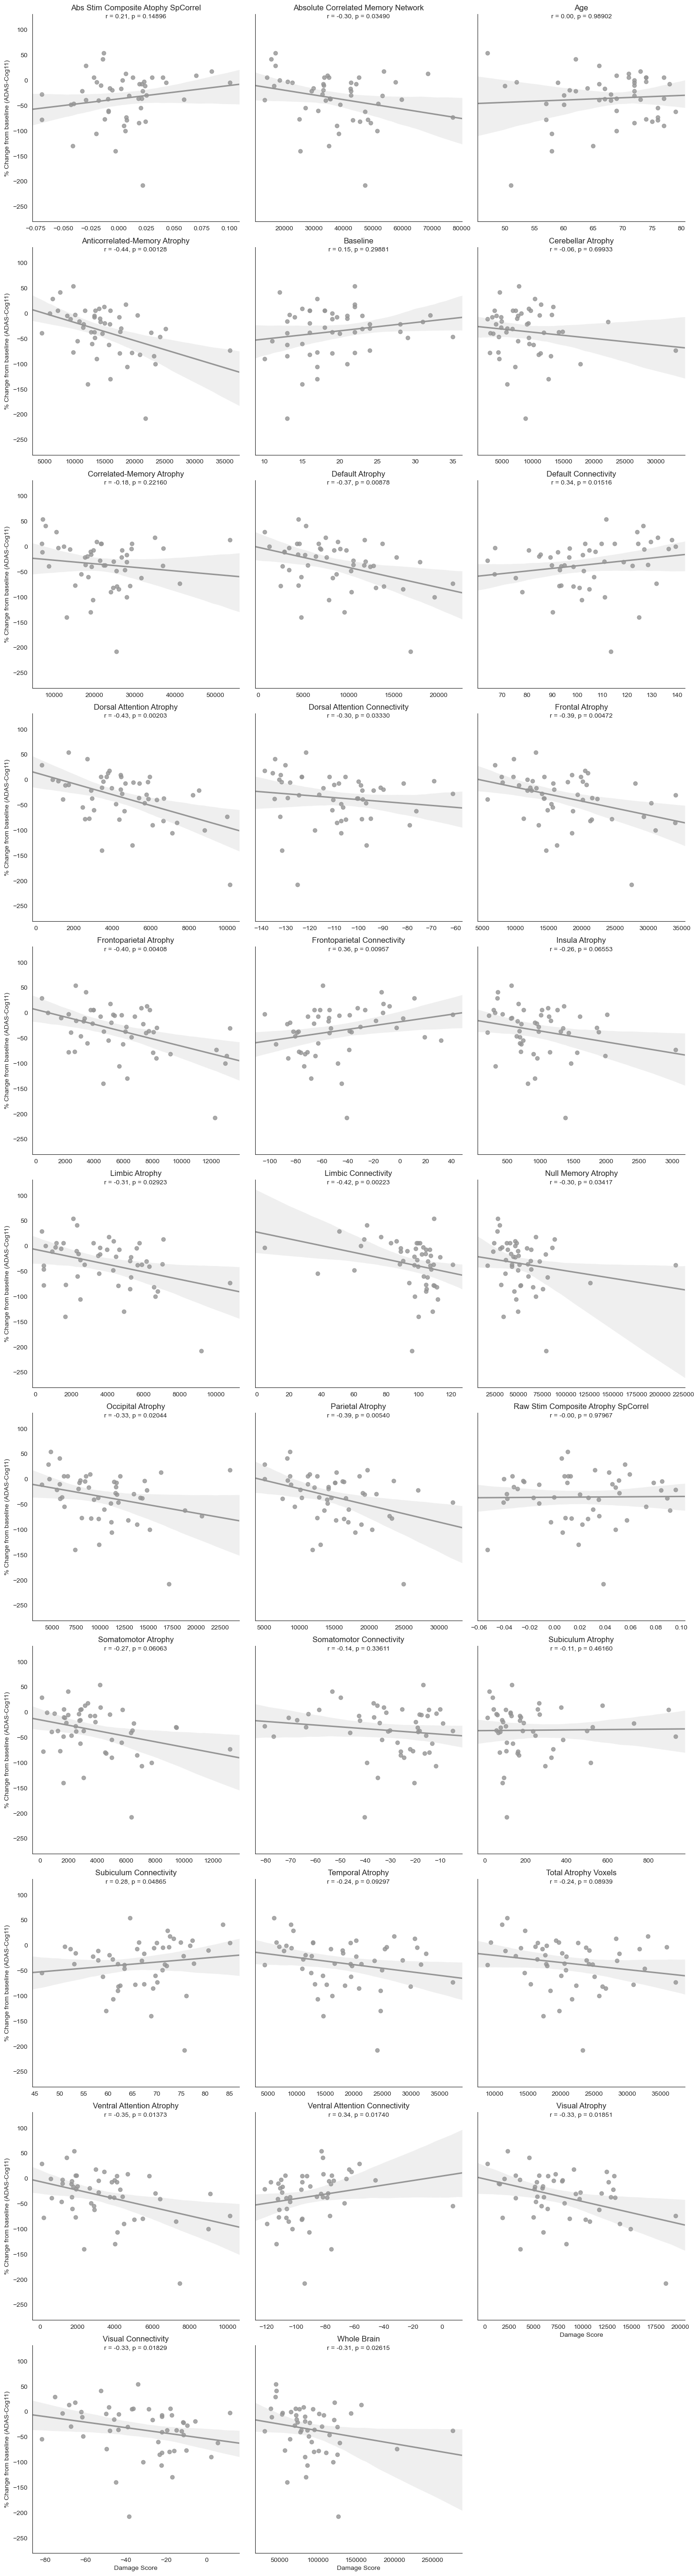

In [15]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

num_columns=3
###----------------------------------------------------------------
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
facet_plot = sns.lmplot(y=dependent_variable, x=independent_measurement_name, data=melted_df,
           col=what_are_the_independent_variables,
           truncate=False, col_wrap=num_columns,
           facet_kws=dict(sharex=False, sharey=True)) #sharex and sharey disallows axis from ranging across subplots. Good for visualizaiton. 

#Calculate pearsonr for each cluster of Connection Regions
grouped_df = melted_df.groupby(what_are_the_independent_variables)
result = grouped_df.apply(lambda x: spearmanr(x[independent_measurement_name], x[dependent_variable]))


#Organize the outputs of the pearson to match the facet plot
rearranged_results = []
for region in melted_df[what_are_the_independent_variables].unique():
    rearranged_results.append(result[region])
result = rearranged_results
    
for i, ax in enumerate(facet_plot.axes):
    r, p = result[i]
    region = melted_df[what_are_the_independent_variables].unique()[i]
    title = f"{region}"
    ax.set_title(title)
    ax.annotate(f"r = {r:.2f}, p = {p:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='top',
            bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
facet_plot.set_xlabels(what_are_the_independent_variables)


In [50]:
#Save the Elbow Plot Above
if save:
    save_dirsvg = os.path.join(out_dir, 'linear_model_facet_plot.svg')
    save_dirpng = os.path.join(out_dir, 'linear_model_facet_plot.png')
    facet_plot.savefig(save_dirsvg)
    facet_plot.savefig(save_dirpng)
    print(f'Fig saved to ', save_dirpng)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_analyses/ses-01/sub-all/yeo_stim_composite_atrophy_clinical/basic_analysis/linear_model_facet_plot.png


## Assess overall dsitributions

<Figure size 2000x700 with 0 Axes>

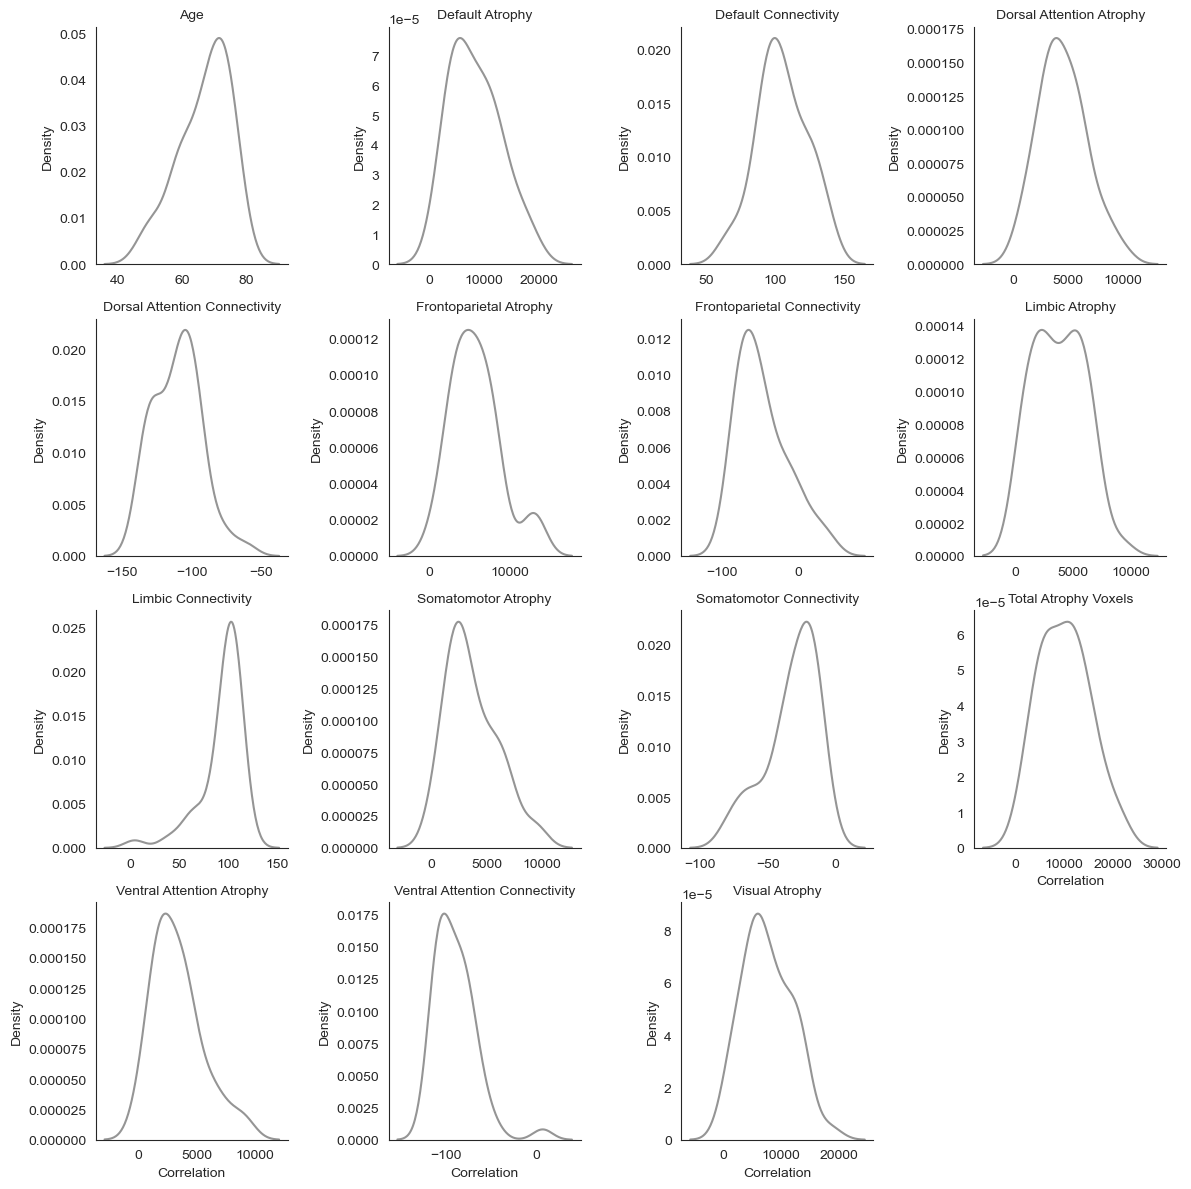

In [51]:
#View distributions
import seaborn as sns
from scipy.stats import pearsonr
plt.figure(figsize=(20,7))
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
facet_grid = sns.FacetGrid(data=melted_df, col=what_are_the_independent_variables,
                           col_wrap=4, sharex=False, sharey=False);
facet_grid.set_titles(col_template="{col_name}")
facet_grid.map(sns.kdeplot,independent_measurement_name);
# sns.kdeplot(data=melted_df, x='Connectivity', col='Connection Region')

In [52]:
#Save the Elbow Plot Above
if save:
    save_dir = os.path.join(out_dir, 'kde_plot_facet_plot.png')
    facet_plot.savefig(save_dir)
    print(f'Fig saved to ', save_dir)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_analyses/ses-01/sub-all/yeo_stim_composite_atrophy_clinical/basic_analysis/kde_plot_facet_plot.png


# Plot the Difference Between 2 Variables

ScatterWithConfidence class:

ScatterWithConfidence Class
The ScatterWithConfidence class is designed to generate scatter plots with associated confidence intervals and permutation-based p-values. It creates plots of two variables and segregates them by a specified criterion, such as age. These plots are further enhanced by overlaying regression lines with their associated confidence intervals. The class can also perform permutation tests to compute a p-value, which is then prominently displayed in the plot title.

Attributes:
data_df (pandas.DataFrame): The main dataframe containing the data intended for plotting.
Key Methods:
1. compute_analytic_confidence_interval(x, y, x_vals)
Purpose: Computes the regression line and its 95% confidence intervals using analytic methods.
Parameters:
x (pandas.Series): The x-values of the data.
y (pandas.Series): The y-values of the data.
x_vals (numpy.ndarray): The x-values where the regression line and confidence intervals should be computed.
Returns:
y_fit: Regression line values.
lower_bound: Lower 95% confidence interval.
upper_bound: Upper 95% confidence interval.
2. permute_data_and_difference_in_pearson_r(...)
Purpose: Computes the difference in Pearson R between two groups using permutation tests.
Parameters:
x_one, x_two (str): Column names of the two variables to be correlated.
split_by (str): Column name used to segregate the data.
split_value (float): The criterion value for data segregation.
n_permutations (int, optional): Number of permutations to perform (default is 1000).
permute_columns (list of str, optional): List of column names to be permuted.
Returns:
original_diff: Difference in Pearson R of the original data between two groups.
p_value: Permutation-based p-value.
3. plot_with_analytic_ci_manual_pvalue(...)
Purpose: Generates a scatter plot with regression lines, confidence intervals, and the permutation-based p-value in the title.
Parameters:
x_one, x_two (str): Column names of the two variables for plotting.
split_by (str): Column name for data segregation.
... (Other parameters for customization, saving, etc.)
Returns:
A matplotlib scatter plot.
To utilize this class:

Initialize the class with your dataset.
Use the methods described above to compute confidence intervals or perform permutation tests.
Generate and visualize your enhanced scatter plot using the provided methods.
Example:

python
Copy code
scatter_plotter = ScatterWithConfidence(data_df)
scatter_plotter.plot_with_analytic_ci_manual_pvalue(...)
Remember to replace ... with appropriate arguments as your situation demands.

In [53]:
# Redefining the class and its methods
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
class ScatterWithConfidence:
    def __init__(self, data_df):
        self.data_df = data_df

    @staticmethod
    def compute_analytic_confidence_interval(x, y, x_vals):
        slope, intercept = np.polyfit(x, y, 1)
        y_fit = slope * x_vals + intercept
        
        residuals = y - (slope * x + intercept)
        stderr = np.sqrt(np.sum(residuals**2) / (len(y) - 2))
        
        t_value = t.ppf(0.975, df=len(x)-2)
        ci = t_value * stderr * np.sqrt(1/len(x) + (x_vals - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
        
        upper_bound = y_fit + ci
        lower_bound = y_fit - ci
        
        return y_fit, lower_bound, upper_bound

    def permute_data_and_difference_in_pearson_r(self, x_one, x_two, split_by, split_value, n_permutations=1000, permute_columns=[]):
        original_diff = self.data_df[self.data_df[split_by] < split_value][x_one].corr(self.data_df[self.data_df[split_by] < split_value][x_two]) - \
                       self.data_df[self.data_df[split_by] >= split_value][x_one].corr(self.data_df[self.data_df[split_by] >= split_value][x_two])

        permuted_diffs = []

        for _ in range(n_permutations):
            permuted_df = self.data_df.copy()
            for column in permute_columns:
                permuted_df[column] = np.random.permutation(permuted_df[column].values)
            
            diff = permuted_df[permuted_df[split_by] < split_value][x_one].corr(permuted_df[permuted_df[split_by] < split_value][x_two]) - \
                   permuted_df[permuted_df[split_by] >= split_value][x_one].corr(permuted_df[permuted_df[split_by] >= split_value][x_two])
            
            permuted_diffs.append(diff)

        p_value = np.mean([diff <= original_diff for diff in permuted_diffs])
        return original_diff, p_value

    def plot_with_analytic_ci_manual_pvalue(self, x_one, x_two, split_by, split_value, x_label='X1', y_label='X2', alpha=0.3, manual_p_value=None, permute_column=None, save=False, out_dir=None):
        fig, ax = plt.subplots(figsize=(6, 5))
        
        group1 = self.data_df[self.data_df[split_by] < split_value]
        group2 = self.data_df[self.data_df[split_by] >= split_value]
        
        ax.scatter(group1[x_one], group1[x_two], color='blue', label='Young', s=40, alpha=0.6, marker='o')
        ax.scatter(group2[x_one], group2[x_two], color='red', label='Old', s=40, alpha=0.6, marker='o')
        
        x_vals = np.linspace(self.data_df[x_one].min(), self.data_df[x_one].max(), 400)
        
        for group, color in [(group1, 'blue'), (group2, 'red')]:
            y_fit, lower_bound, upper_bound = self.compute_analytic_confidence_interval(group[x_one], group[x_two], x_vals)
            ax.plot(x_vals, y_fit, color=color)
            ax.fill_between(x_vals, lower_bound, upper_bound, color=color, alpha=alpha)
        
        if manual_p_value is None:
            if permute_column:
                rho, manual_p_value = self.permute_data_and_difference_in_pearson_r(x_one, x_two, split_by, split_value, n_permutations=1000, permute_columns=[permute_column])
            else:
                rho, manual_p_value = self.permute_data_and_difference_in_pearson_r(x_one, x_two, split_by, split_value, n_permutations=1000, permute_columns=[x_one, x_two, split_by])
        
        ax.set_title(f"Delta Rho: {rho:.2f} | p-value: {manual_p_value:.4f}")
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.legend(loc='best', frameon=False)
        ax.grid(False)
        sns.despine(ax=ax)
        
        if save and out_dir is not None:
            plt.savefig(f"{out_dir}/scatter_with_polyfit_and_analytic_ci.png", bbox_inches='tight')
            plt.savefig(f"{out_dir}/scatter_with_polyfit_and_analytic_ci.svg", bbox_inches='tight')
            print(f'Saved to {out_dir}/scatter_with_polyfit_and_analytic_ci.svg')
        return fig

In [54]:
data_df.columns

Index(['ID', 'preOP', 'postOP', 'diff. Mattis', 'perc_change_mattis',
       'perc_improvement', 'Age', 'Subiculum Connectivity',
       'Subiculum Grey Matter Z Score', 'Subiculum CSF Z Score',
       'Hippocampus Grey Matter Z Score', 'Temporal Grey Matter',
       'Frontal Grey Matter', 'Parietal Grey Matter', 'Cerebellum Grey Matter',
       'Insula Grey Matter', 'Occipital Grey Matter', 'Temporal CSF',
       'Frontal CSF', 'Parietal CSF', 'Cerebellum CSF', 'Insula CSF',
       'Occipital CSF'],
      dtype='object')

In [55]:
data_df

,ID,preOP,postOP,diff. Mattis,perc_change_mattis,perc_improvement,Age,Subiculum Connectivity,Subiculum Grey Matter Z Score,Subiculum CSF Z Score,...,Parietal Grey Matter,Cerebellum Grey Matter,Insula Grey Matter,Occipital Grey Matter,Temporal CSF,Frontal CSF,Parietal CSF,Cerebellum CSF,Insula CSF,Occipital CSF
0,01_MD_STN_WUE,141,133,8,5.673759,-5.673759,57.0,30.376565,6.512501,-0.398597,...,-1976.341755,-3719.111100,-62.404583,-2425.064234,2717.531192,3274.969500,2555.225311,3014.354078,137.111070,1058.148886
1,02_MD_STN_WUE,139,142,-3,-2.158273,2.158273,50.0,16.295870,6.534732,1.800272,...,-1940.598125,-2660.194888,-15.405884,-2243.533166,3773.894659,4282.186963,5489.567043,5016.214045,100.619401,3090.473869
2,03_MD_STN_WUE,144,142,2,1.388889,-1.388889,62.0,30.900051,5.296124,0.482642,...,-2373.855435,-2599.883362,-81.099228,-1997.575640,2205.269376,4851.137835,4582.706964,2597.594845,57.808380,1817.064251
3,04_MD_STN_WUE,140,137,3,2.142857,-2.142857,50.0,21.207602,4.737163,0.244241,...,-1858.820143,-640.947812,-54.575708,-1259.566645,2310.376222,7013.648834,5942.526193,1678.655593,45.111415,3116.234218
4,06_MD_STN_WUE,142,141,1,0.704225,-0.704225,60.0,23.577739,6.755988,0.428132,...,-1670.182431,-2827.734472,-20.538637,-1728.700346,3068.771684,4494.630519,4986.667096,2213.280207,15.092940,3814.931576
5,07_MD_STN_WUE,141,140,1,0.709220,-0.709220,73.0,36.657479,9.615373,-0.967502,...,-3574.112183,-3463.498433,-31.673424,-2876.507375,2687.666322,6022.909065,5186.663896,4006.637105,51.998862,3863.805039
6,09_MD_STN_WUE,140,137,3,2.142857,-2.142857,64.0,19.955774,2.727865,1.893940,...,-2133.432099,-1512.828590,-26.157185,-2101.270398,6332.192081,7232.141880,10798.652310,5384.927265,293.048064,8801.199497
7,11_MD_STN_WUE,144,143,1,0.694444,-0.694444,62.0,15.156220,9.690537,0.429385,...,-2235.306135,-11721.500200,-148.456436,-2945.341883,4900.663163,6623.496312,5870.144660,7635.663451,298.252447,3078.122247
8,12_MD_STN_WUE,136,136,0,0.000000,0.000000,54.0,28.328345,8.206324,1.024292,...,-1943.240602,-2147.541732,-35.716121,-1347.213878,1177.127702,2412.793083,1899.574052,2101.176103,27.048623,722.219549
9,14_MD_STN_WUE,143,144,-1,-0.699301,0.699301,49.0,19.619016,11.117583,-0.563379,...,-2157.502715,-1378.384956,-30.403567,-1876.423284,1126.156064,3928.519316,2995.385882,1955.263740,7.257645,420.184776


Saved to /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/clinical_analyses/ses-01/sub-all/all_data/scatterplot_analysis/scatter_with_polyfit_and_analytic_ci.svg


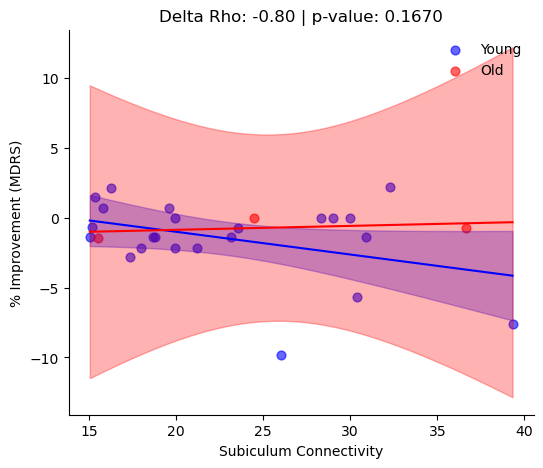

In [57]:
# Create an instance of the class
scatter_plotter = ScatterWithConfidence(data_df)

# Generate and display the plot
fig = scatter_plotter.plot_with_analytic_ci_manual_pvalue(x_one="Subiculum Connectivity",
                                                         x_two="perc_improvement",
                                                         split_by="Age",
                                                         split_value=65.7,
                                                         x_label="Subiculum Connectivity",
                                                         y_label="% Improvement (MDRS)",
                                                         manual_p_value=None,
                                                         save=True, 
                                                         out_dir=out_dir)
plt.show()


# Analyze an Individual Variable

In [ ]:
print(data_df.columns.values.tolist())

['% Improvement (ADAS-Cog11)', 'Unnamed: 0', 'Randomization Arm', 'Patient # CDR, ADAS', 'Age at DOS', 'Baseline ADAS-Cog11', 'Baseline CDR (sum of squares)', '% Change from baseline (CDR)', 'ADAS Cog-11 Map', 'ADAS Cog-11 ROI', 'ADAS Cog-11 ROI Map']


In [ ]:
#Use Above to Determine Calculation Method
ycolumn_of_interest = '% Improvement (ADAS-Cog11)'
y_vals = data_df[ycolumn_of_interest].values.tolist()
# y_vals = data_df.iloc[:, 0].tolist()

xcolumn_of_interest = 'Maxima'
x_vals = data_df[xcolumn_of_interest].values.tolist()
# x_vals = data_df.iloc[:, 1].tolist()


print('No. datapoints in y_vals: ', len(y_vals))
print(y_vals)

print('No. datapoints in x_vals: ', len(x_vals))
print(x_vals)
# print(x_vals)

No. datapoints in y_vals:  50
[-21.42857143, -36.36363636, -78.94736842, -129.4117647, -10.52631579, -38.46153846, -15.38461538, -29.16666667, -30.43478261, -84.61538462, 41.66666667, 9.333333333, -60.0, -16.12903226, -48.27586207, -36.84210526, -3.125, -81.25, -27.77777778, -4.347826087, -140.0, 54.54545455, -18.75, -37.5, -100.0, -76.47058824, -20.83333333, -35.71428571, -7.142857143, -40.0, 6.25, 29.41176471, -45.71428571, -77.27272727, -9.523809524, -105.8823529, 18.18181818, 0.0, 5.555555556, 6.25, -61.53846154, 5.555555556, -54.54545455, -4.761904762, -207.6923077, -90.0, 13.63636364, -7.142857143, -2.255639098, -73.33333333]
No. datapoints in x_vals:  50
[-70.5607672, -60.75109563, -66.13550274, -72.29303065, -39.72891662, -71.29501504, -50.61992638, -41.17825148, -54.77484033, -58.80073931, -56.26137339, -50.83531751, -67.9098056, -64.50346925, -29.88019314, -65.83703016, -17.6776819, -59.88055741, -61.93946405, -42.74793196, -50.24585351, -55.38957681, -72.32283826, -45.850982

## Transform Data if Needed

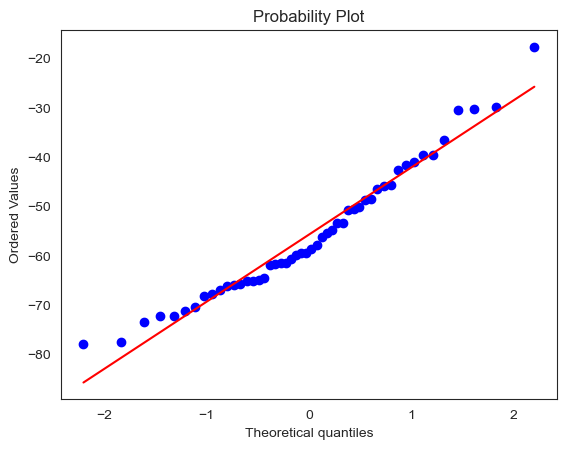

In [ ]:
#Visualize Q-Q Plots
import scipy.stats as stats
stats.probplot(x_vals, plot=plt);

In [ ]:
#Define Transformations
import seaborn as sns
import scipy.stats as stats
#function to return plots for the feature
def normality_plot(data, transform_function=None):
    sns.set_style('white')
    if transform_function is not None:
        data = eval(transform_function)
    
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data, plot=plt)
    plt.show()
    return data, fig

def linear_transform(data):
    transformed = data
    return transformed

def natlog_transform(data):
    transformed=np.log(data)
    return transformed

def reciprocal_transform(data):
    transformed = np.divide(1,data)
    return transformed

def root_transform(data):
    transformed = np.sqrt(data)
    return transformed

def exponential_transform(data, exponent=2):
    transformed = np.power(data, exponent)
    return transformed

def boxcox_transform(data):
    transformed = stats.boxcox(data)
    return transformed

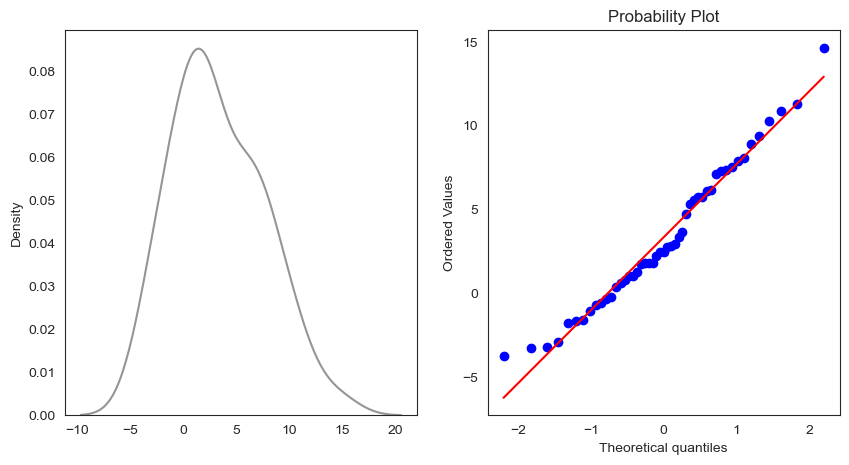

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/addbs_vta_to_memory_net_maxima/composite_memnet_maxima_analysis


In [ ]:
## --- transforms = linear_transform, natlog_transform, reciprocal_transform, root_transform, exponential_transform, boxcox_transform
transform = 'linear_transform' #'#'boxcox_transform'
transformed_data, transform_fig = normality_plot(x_vals, f'{transform}({x_vals})')
if save:
    transform_fig.savefig(os.path.join(out_dir, f'transformed_data_{transform}_{xcolumn_of_interest}.png'))
    print(f'Fig saved to ', out_dir)

In [ ]:
#Turn transformed data into x_vals
if do_transform: 
    try:
        x_vals = transformed_data.tolist()
        x_vals = np.nan_to_num(x_vals, nan=1, posinf=1, neginf=1) #np.replace(np.nan, np.mean(x_vals))
        mean = np.mean(x_vals)
        x_vals[x_vals == 1] = mean
        print(len(x_vals))
        print(x_vals)
    except:
        print()

## Calculate Pearson Correlation Coefficient

In [ ]:
from scipy.stats import pearsonr
x=x_vals
y=y_vals
r, p = pearsonr(x, y)


#Creating regression line
m, b = np.polyfit(x,y,1)
plotline = []
for a in range(0,len(x_vals)):
    plotline.append(x_vals[a]*m+b)

arb = np.polyfit(x,y,1)
p1 = np.poly1d(arb)
fit1 = np.polyval(arb, x); res1 = np.sum((y-fit1)**2)

arb = np.polyfit(x,y,2)
p2 = np.poly1d(arb)
fit2 = np.polyval(arb, x); res2 = np.sum((y-fit2)**2)

arb = np.polyfit(x,y,3)
p3 = np.poly1d(arb)
fit3 = np.polyval(arb, x); res3 = np.sum((y-fit3)**2)

arb = np.polyfit(x,y,4)
p4 = np.poly1d(arb)
fit4 = np.polyval(arb, x); res4 = np.sum((y-fit4)**2)

arb = np.polyfit(x,y,5)
p5 = np.poly1d(arb)
fit5 = np.polyval(arb, x); res5 = np.sum((y-fit5)**2)


In [ ]:
#calculate spearman's rho
from scipy.stats import spearmanr
correlation_dict = {}
pearson_results = pearsonr(x, y)
correlation_dict['pearson_r'] = pearson_results[0]
correlation_dict['pearson_p'] = pearson_results[1]
spearman_results = spearmanr(x, y)
correlation_dict['spearman_r'] = spearman_results[0]
correlation_dict['spearman_p'] = spearman_results[1]

print(pearson_results)
print(spearman_results)
correlation_df = pd.DataFrame(correlation_dict, index=['results'])
display(correlation_df)

if save:
    correlation_df.to_csv(os.path.join(out_dir, f'correlation_results_{xcolumn_of_interest}_{transform}.csv'))

PearsonRResult(statistic=0.31061616140772774, pvalue=0.02983842687617675)
SpearmanrResult(correlation=0.31068704328566815, pvalue=0.02979911261968707)


,pearson_r,pearson_p,spearman_r,spearman_p
results,0.310616,0.029838,0.310687,0.029799


## Plot the values

Text(0, 0.5, 'Least squares error')

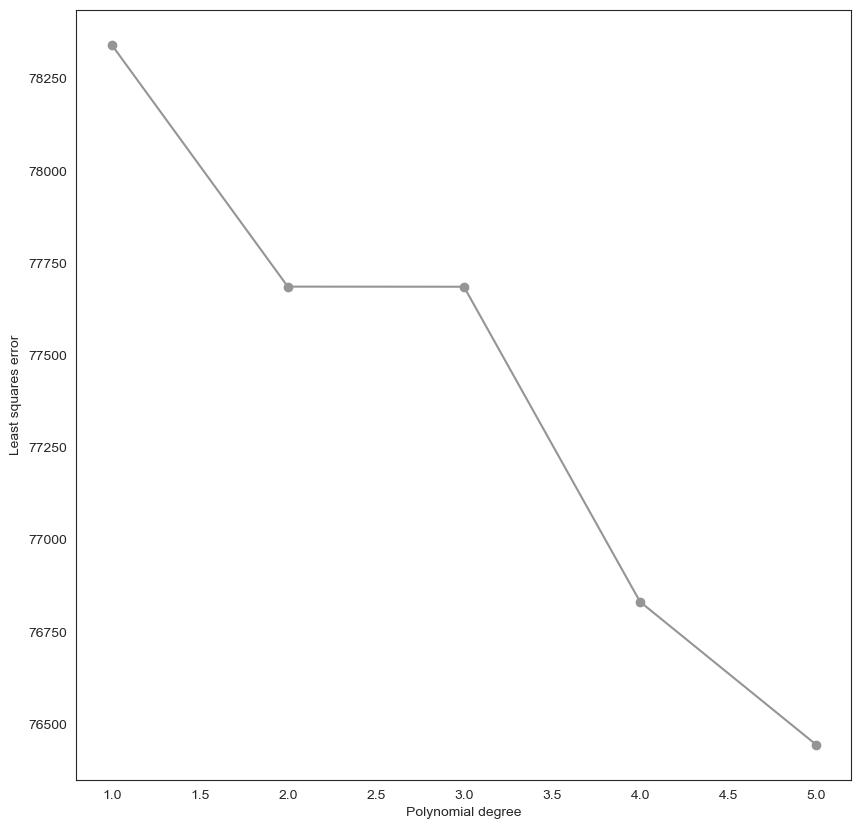

In [ ]:
#Plot the LOBF Least Squares Distribution
resids = [res1, res2, res3, res4, res5]
xres = range(0+1, len(resids)+1)
figure_res = plt.figure(figsize = (10,10))
plt.plot(xres, resids, 'o-')
plt.xlabel('Polynomial degree')
plt.ylabel('Least squares error')

In [ ]:
#Save the Elbow Plot Above
save_dir = os.path.join(out_dir, analysis) + f'{xcolumn_of_interest}_{transform}polynomial_elbow_plot.png'
figure_res.savefig(save_dir)
print(f'Fig {figure_res} \n saved to ', save_dir)

Fig Figure(1000x1000) 
 saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/addbs_vta_to_memory_net_maxima/composite_memnet_maxima_analysis/composite_memnet_maxima_analysisR. Sup. Front._linear_transformpolynomial_elbow_plot.png


Text(0.5, 1.0, 'Pearson: 0.31061616140772774 & p value: 0.02983842687617675')

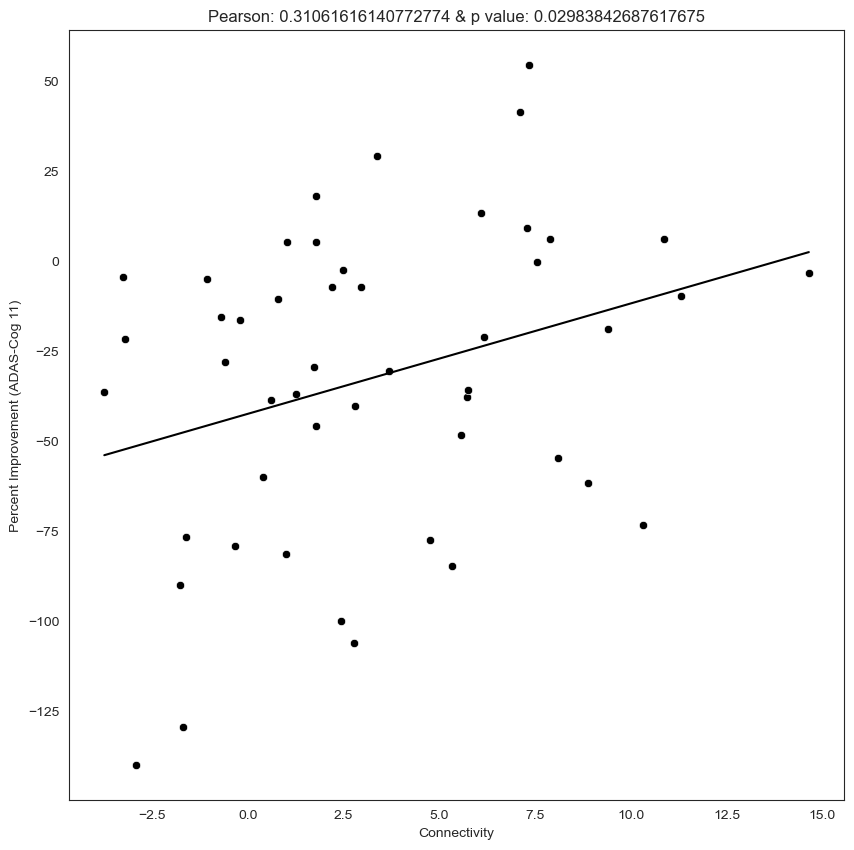

In [ ]:
import seaborn as sns
plt.style.use('grayscale')
sns.set_style('white')
figure = plt.figure(figsize = (10,10))

#plot the datapoints
sns.scatterplot(x=x, y=y) 

#Plot regresison line
smooth = np.linspace(np.min(x), np.max(x), 100)
plt.plot(smooth, p1(smooth), '-')#, smooth, p2(smooth), '-', smooth, p3(smooth), '-', smooth, p4(smooth), '-', smooth, p5(smooth), '-')
# plt.legend([1, 2, 3, 4, 5])

plt.xlabel('Connectivity')
plt.ylabel('Percent Improvement (ADAS-Cog 11)')
plt.title('Pearson: ' + str(r) + ' & p value: ' + str(p))

## Save Figure if Desired

In [ ]:
save_dir = os.path.join(out_dir, analysis) + f'{xcolumn_of_interest}_{transform}_linear_fit.png'
figure.savefig(save_dir)
print('Fig saved to ', save_dir)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/adas_cog11_derivatives/comparison_across_adascog11_derivates_outlier_removed/comparison_across_adascog11_derivates_outlier_removedADAS Cog-11 ROI Map_linear_transform_linear_fit.png


# Perform Secondary Analysis Stratifying By Third Variable

In [ ]:
# Prepare Third Variable
#User Input Below -- What dataframe has your third variable?
metric = 'Age at DOS' #-- What column has your third variable?
metric_val = 65


In [ ]:
z_vals = data_df[metric].values.tolist()
print('No. datapoints in z_vals: ', len(z_vals))
print(z_vals)

No. datapoints in z_vals:  37
[62, 77, 76, 65, 66, 72, 72, 69, 67, 67, 52, 75, 72, 47, 61, 73, 69, 74, 72, 69, 66, 68, 66, 57, 57, 72, 58, 73, 72, 77, 71, 79, 74, 76, 59, 77, 71]


In [ ]:
#Manipute z vals

over_65_x = []
over_65_y = []
under_65_x = []
under_65_y = []
#THE BELOW LOOP WILL CREATE NEW DATASETS DETERMINED BY THE Z VALUE: AGE. 
for i in range(0, len(z_vals)):
    if z_vals[i] > metric_val:
        over_65_x.append(x_vals[i])
        over_65_y.append(y_vals[i])
    elif z_vals[i] <= metric_val:
        under_65_x.append(x_vals[i])
        under_65_y.append(y_vals[i])
    else:
        print('Some error occured')
print('Len >65: ', len(over_65_x))
print('Len <=65: ', len(under_65_x))

Len >65:  28
Len <=65:  9


In [ ]:
#Correlations on new lists
r_over_65, p_over_65 = pearsonr(over_65_x, over_65_y)
print('Over 65 \n r: ', r_over_65, ' | p: ', p_over_65)
r_under_65, p_under_65 = pearsonr(under_65_x, under_65_y)
print('Under 65 \n r: ', r_under_65, ' | p: ', p_under_65)

#Line of Best Fit on New Lists
m_over, b_over = np.polyfit(over_65_x,over_65_y,1)
over_plotline = []
for a in range(0,len(over_65_x)):
    over_plotline.append(over_65_x[a]*m_over+b_over)

m_under, b_under = np.polyfit(under_65_x,under_65_y,1)
under_plotline = []
for a in range(0,len(under_65_x)):
    under_plotline.append(under_65_x[a]*m_under+b_under)


Over 65 
 r:  -0.1051033563586381  | p:  0.5945345373861903
Under 65 
 r:  0.11700172837864027  | p:  0.7643484164053818


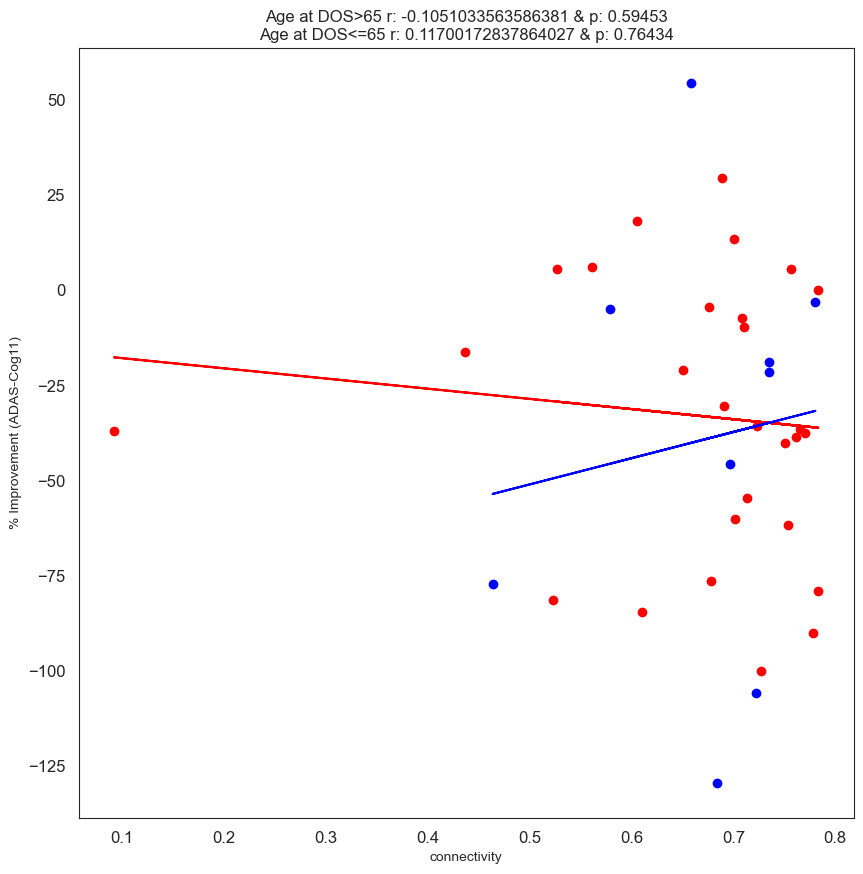

In [ ]:
#Plot the new data
figure2 = plt.figure(figsize = (10,10))
x_label = 'connectivity'
plt.xlabel(x_label)
plt.ylabel('% Improvement (ADAS-Cog11)')
plt.tick_params(labelsize=12, pad=6)

plt.title(f'{metric}>{metric_val} r: {r_over_65} & p: ' + str(p_over_65)[0:7] + '\n' + 
            f'{metric}<={metric_val} r: ' +str(r_under_65) + ' & p: ' +str(p_under_65)[0:7])

#Plot Over 65s
plt.scatter(over_65_x, over_65_y, c='red')
plt.plot(over_65_x, over_plotline, color='red')
#Plot Under 65s
plt.scatter(under_65_x, under_65_y, c='blue')
plt.plot(under_65_x, under_plotline, color='blue')


In [ ]:
out_dir2 = os.path.join(out_dir, 'by_age')
if os.path.isdir(out_dir2)==False:
    os.mkdir(out_dir2)
save_dir2 = os.path.join(out_dir2, analysis) + '_split_by_outcome_outlier_removed.png'
figure2.savefig(save_dir2)

print(f'saved to {out_dir2}')

saved to /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/yeo_rois/comparison_across_yeo_rois_manually_gathered_outlier_out/by_age
